# SVM을 훈련시키보자

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

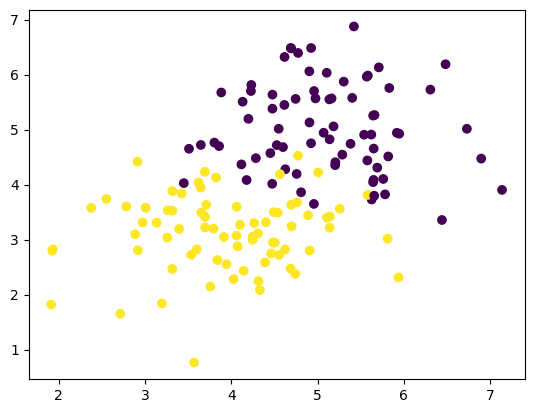

In [98]:
# Generate data

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [99]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear', C=1, degree=1)

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


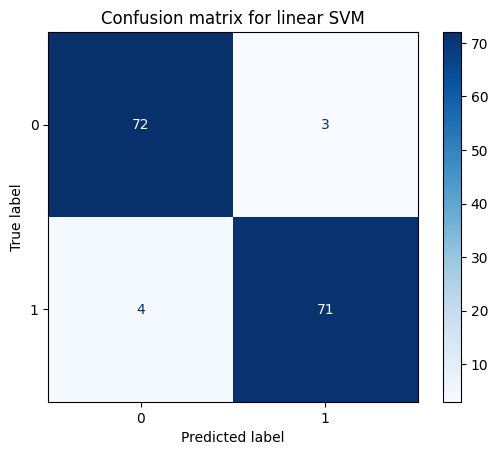

In [100]:
# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svm, X, y,
                                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [101]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9533


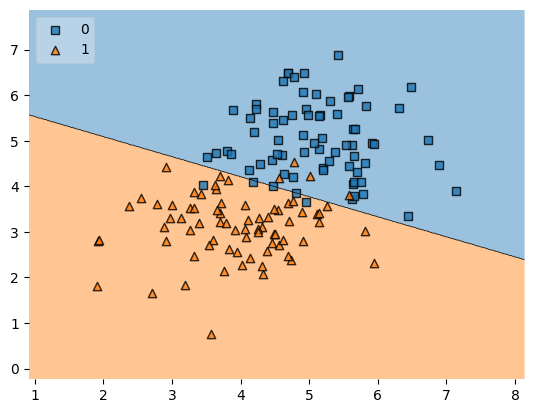

In [102]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

# 모델을 평가하려면, 데이터를 어떻게 나누지?

In [103]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [104]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9667
Model testing accuracy: 0.9000


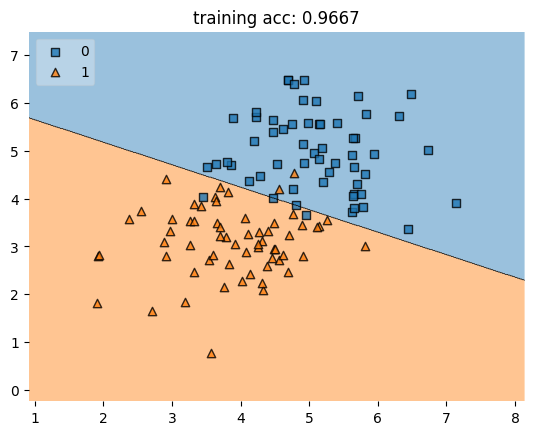

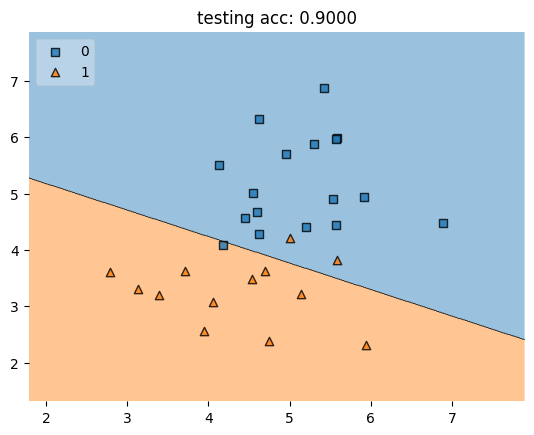

In [105]:
# Plot decision boundary for training data
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
plt.title(f'training acc: {train_accuracy:.4f}')
plt.show()

# Plot decision boundary for testing data
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.title(f'testing acc: {test_accuracy:.4f}')
plt.show()

# 모델이 정말로 견고한지(Robust) 확인해보자!!!
## 교차 검증(Cross Validation).

교차 검증은 데이터를 k-폴드(k-fold)로 나누는 것입니다. 여기서는 5-폴드(5-fold)를 예시로 듭니다. <br>

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_1 (validation accuracy_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_2 (validation accuracy_2)*를 얻게 됩니다. <br>

**세 번째 반복**,
* 1, 2, 4, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 3번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_3 (validation accuracy_3)*을 얻게 됩니다. <br>

**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
평균 정확도를 계산하여 모델의 성능을 평가할 수 있습니다.**

In [106]:
from sklearn.model_selection import KFold
# refer to https://scikit-learn.org/stable/modules/cross_validation.html

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')

Fold  1
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9417
Model testing accuracy: 0.9333
------------------------------------
Fold  2
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9500
Model testing accuracy: 0.9000
------------------------------------
Fold  3
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9500
Model testing accuracy: 0.9000
------------------------------------
Fold  4
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9333
Model testing accuracy: 1.0000
------------------------------------
Fold  5
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9583
Model testing accuracy: 0.9000
------------------------------------
Validation Accuracy: 0.9467 +- 0.0389


# 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

우리는 튜닝 가능한 파라미터들이 있다는 것을 알고 있습니다. 예를 들어, 커널(선형 / 다항식 / rbf)이나 C(규제항)를 선택하는 것 등입니다. 최적의 하이퍼파라미터를 결정하기 위해, 우리는 교차 검증(Cross Validation) 개념을 사용하여 최적의 값을 찾는 grid_search를 사용합니다.


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**데이터를 학습(Train), 검증(Validation), 테스트(Test) 세트로 분할**

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* 가장 높은 검증 정확도를 보이는 모델이 선택됩니다.
* *검증 정확도_1 (validation accuracy_1)*과 *하이퍼파라미터 세트_1 (hyperparameter_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* *검증 정확도_2 (validation accuracy_2)*와 *하이퍼파라미터 세트_2 (hyperparameter_2)*를 얻게 됩니다. <br>


**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
가장 높은 검증 정확도를 제공하는 하이퍼파라미터 세트가 선택됩니다. <br>
선택된 최적의 하이퍼파라미터를 사용하여 모든 학습 + 검증 데이터를 합친 데이터로 모델을 재학습(Retrain)시킵니다. <br>
테스트 세트에서 최종 모델을 평가합니다**

### 앞서 설명한 절차를 수행하는 GridSearchCV를 사용할 수 있습니다.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/iris.PNG" width="620"/>

이 예제에서는 iris(붓꽃) 데이터를 사용합니다.
X는 4개의 변수를 가집니다.
1. 꽃받침 길이 (sepal length in cm)
2. 꽃받침 너비 (sepal width in cm)
3. 꽃잎 길이 (petal length in cm)
4. 꽃잎 너비 (petal width in cm)

y는 3개의 출력을 가집니다.
* 0 -- Iris Setosa
* 1 -- Iris Versicolour
* 2 -- Iris Virginica

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


no of training data:  120
no of testing data:  30


In [108]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001704,0.000433,0.001015,0.000262,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
1,0.001324,0.000049,0.000849,0.000021,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.966667,0.766667,0.933333,0.900000,0.891667,0.075920,6
2,0.000945,0.000010,0.000718,0.000013,1.0,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.966667,0.933333,0.966667,0.966667,0.023570,1
3,0.001277,0.000266,0.000902,0.000146,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
4,0.000971,0.000046,0.000714,0.000018,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.966667,0.933333,0.933333,1.000000,0.958333,0.027639,5
5,0.000974,0.000007,0.000732,0.000012,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,0.966667,0.933333,0.966667,0.958333,0.014434,2


In [109]:
# Retrain the model with the best hyperparameter
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 1, 'kernel': 'linear'}


SVC(C=1, kernel='linear')

In [110]:
# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

Model CV accuracy:  0.9666666666666668
Model testing accuracy:  1.0
Parameter used: {'C': 1, 'kernel': 'linear'}


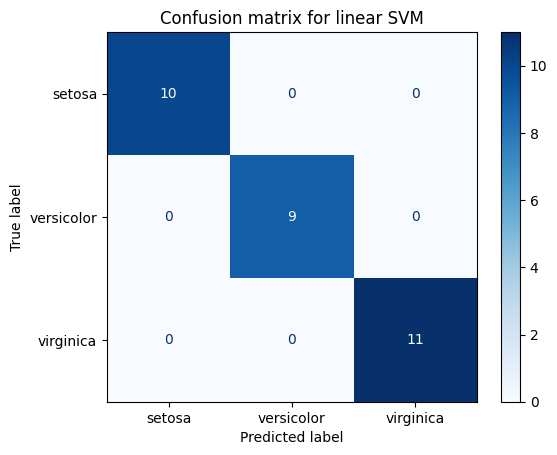

In [111]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,
                              cmap=plt.cm.Blues,
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [112]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 최종과제: 유방암 데이터를 가장 잘 분류하는 SVM 모델 학습

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [114]:
bc = datasets.load_breast_cancer()
X = pd.DataFrame(data=bc.data)
y = bc.target

In [117]:
# 아래부터 과제 진행
# 미디어경영학과 20231659 강남희

Model accuracy: 0.9666


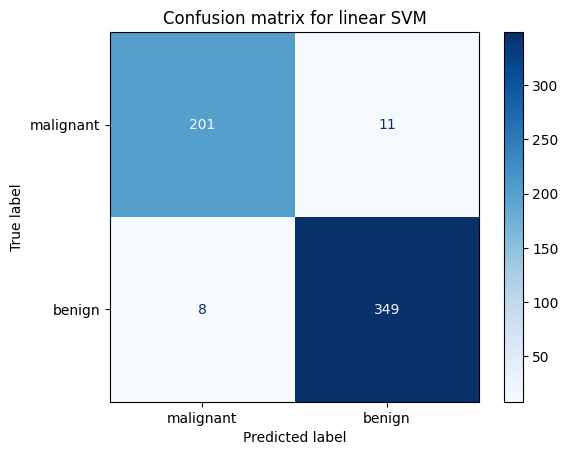

In [118]:
# SVM 모델 생성
svm = SVC(kernel='linear', random_state=42, C=1, degree=1)

# 데이터를 나누지 않고 전체 데이터와 정답을 모두 사용하여 모델 학습
svm.fit(X, y)

# 학습에 사용했던 데이터를 그대로 다시 모델에 넣어 예측값 구하기
y_pred = svm.predict(X)

# 실제 정답과 모델이 예측한 값이 얼마나 일치하는지 계산
accuracy = accuracy_score(y, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Confusion Matrix 시각화
# 모델이 클래스를 얼마나 잘 분류했는지 시각적으로 표현
matrix = ConfusionMatrixDisplay.from_estimator(
    svm, X, y,
    cmap=plt.cm.Blues,
    display_labels=bc.target_names
)
plt.title("Confusion matrix for linear SVM")
plt.show()

- 출력 결과

    - Model Accuracy: 0.9666 (약 96.7%)

- Confusion Matrix:

    - True Negative (TN, 정상 정답): 349건
    - True Positive (TP, 암 정답): 201건
    - False Positive (FP, 정상 오진): 8건
    - False Negative (FN, 암 놓침): 11건


실험 결과 96.7%라는 매우 높은 정확도가 도출되었다. 그러나 이는 모델의 성능이 우수해서가 아니다. 모델이 학습 과정에서 이미 정답을 본 데이터를 대상으로 시험을 치렀기 때문이다. 이는 전형적인 과적합 상태에 해당하며, 새로운 환자 데이터가 들어왔을 때 이 성능이 유지될 것이라는 보장이 전혀 없다.

이미 답을 알고 있는 상태에도 불구하고, 11명의 암 환자를 놓쳤다는 것은 모델이 데이터의 패턴을 온전히 학습하지 못했음을 의미한다.

In [119]:
# 10%부터 90%까지 다양한 비율로 테스트 데이터를 떼어내며 실험
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

results = []

print("===== Train/Test Split Results =====")

for ts in test_sizes:
    # Train, Test 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ts, random_state=42
    )

    # SVM 모델 생성
    svm = SVC(kernel='linear', random_state=42)

    # 모델 학습 (학습용 데이터인 X_train, y_train만 사용)
    svm.fit(X_train, y_train)

    # 학습 데이터에 대한 예측
    y_pred_train = svm.predict(X_train)
    # 테스트 데이터에 대한 예측
    y_pred_test = svm.predict(X_test)

    # 정확도 평가
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # 학습 점수와 테스트 점수의 차이 계산
    gap = train_accuracy - test_accuracy

    results.append({
        "test_size": ts,
        "train_acc": train_accuracy,
        "test_acc": test_accuracy,
        "gap": gap
    })

    print(f"test_size={ts:0.2f} Train Accuracy={train_accuracy:.4f} Test Accuracy={test_accuracy:.4f}")

===== Train/Test Split Results =====
test_size=0.10 Train Accuracy=0.9629 Test Accuracy=0.9825
test_size=0.20 Train Accuracy=0.9692 Test Accuracy=0.9561
test_size=0.30 Train Accuracy=0.9648 Test Accuracy=0.9649
test_size=0.40 Train Accuracy=0.9648 Test Accuracy=0.9605
test_size=0.50 Train Accuracy=0.9648 Test Accuracy=0.9649
test_size=0.60 Train Accuracy=0.9692 Test Accuracy=0.9561
test_size=0.70 Train Accuracy=0.9529 Test Accuracy=0.9674
test_size=0.80 Train Accuracy=0.9292 Test Accuracy=0.9518
test_size=0.90 Train Accuracy=0.9643 Test Accuracy=0.9337


실험 결과, 단일 random_state와 단순 비율 조정만으로는 모델의 객관적인 성능을 담보할 수 없음을 확인했다. 특히 test_size=0.1에서 Test 정확도가 비정상적으로 높았던 이유는 모델 성능이 우수해서가 아니라, 분류하기 쉬운 샘플들이 우연히 Test Set에 배정되었기 때문으로 해석된다. 이는 데이터가 어떻게 잘리느냐에 따라 성능 평가가 왜곡될 수 있음을 시사한다.

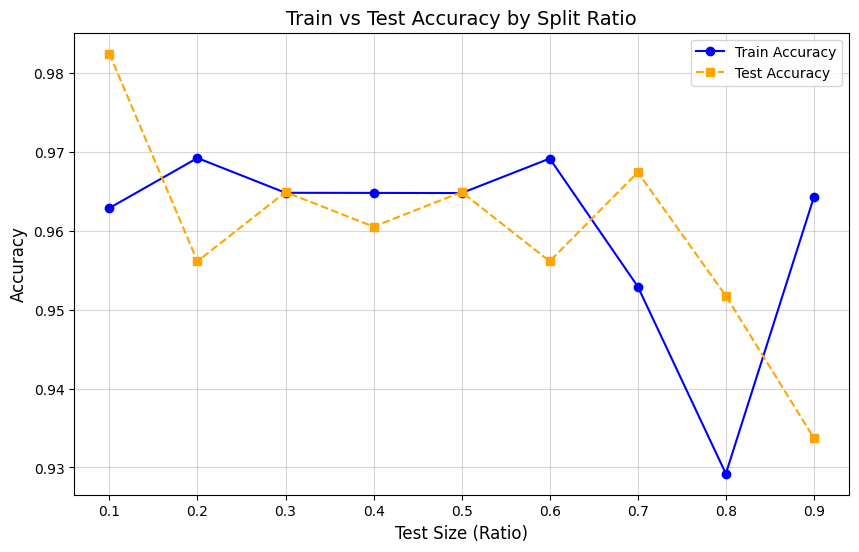

In [120]:
# 학습, 테스트 데이터 성능 시각화
x_values = [r['test_size'] for r in results]
train_acc_list = [r['train_acc'] for r in results]
test_acc_list = [r['test_acc'] for r in results]

plt.figure(figsize=(10, 6))

# Train Accuracy - 학습 데이터 성능
plt.plot(x_values, train_acc_list, marker='o', label='Train Accuracy', color='blue')
# Test Accuracy - 테스트 데이터 성능
plt.plot(x_values, test_acc_list, marker='s', label='Test Accuracy', linestyle='--', color='orange')

plt.title('Train vs Test Accuracy by Split Ratio', fontsize=14)
plt.xlabel('Test Size (Ratio)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x_values)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [121]:
# 실험할 random_state 후보 리스트 (시드값 바꿔가며 결과 확인)
random_states = [0, 21, 42, 100, 123]

# 각 Random State 별로 반복 수행
for rs in random_states:
    print(f"\n===== Random State = {rs} =====")

    # K-Fold 객체 생성
    kf = KFold(n_splits=5, shuffle=True, random_state=rs)

    n = 1
    train_acc = []
    val_acc = []

    for train_index, test_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y[train_index], y[test_index]

        print('Fold ', n)

        svm = SVC(kernel='linear', random_state=rs)
        svm.fit(X_train, y_train)

        y_pred_train = svm.predict(X_train)
        y_pred_val = svm.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        val_accuracy = accuracy_score(y_val, y_pred_val)

        print(f'Model training accuracy: {train_accuracy:.4f}')
        print(f'Model validation accuracy: {val_accuracy:.4f}')
        print('------------------------------------')

        n += 1
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)

    # 5번의 Fold 결과를 평균내어 해당 Random State에서의 최종 성능을 산출
    avg_val = np.mean(val_acc)
    std_val = np.std(val_acc)

    print(f'Random State {rs} → Validation Accuracy: {avg_val:.4f} ± {std_val:.4f}')


===== Random State = 0 =====
Fold  1
Model training accuracy: 0.9648
Model validation accuracy: 0.9561
------------------------------------
Fold  2
Model training accuracy: 0.9604
Model validation accuracy: 0.9912
------------------------------------
Fold  3
Model training accuracy: 0.9714
Model validation accuracy: 0.9298
------------------------------------
Fold  4
Model training accuracy: 0.9670
Model validation accuracy: 0.9474
------------------------------------
Fold  5
Model training accuracy: 0.9627
Model validation accuracy: 0.9646
------------------------------------
Random State 0 → Validation Accuracy: 0.9578 ± 0.0203

===== Random State = 21 =====
Fold  1
Model training accuracy: 0.9670
Model validation accuracy: 0.9386
------------------------------------
Fold  2
Model training accuracy: 0.9670
Model validation accuracy: 0.9474
------------------------------------
Fold  3
Model training accuracy: 0.9736
Model validation accuracy: 0.9211
----------------------------------

5가지 시나리오 모두 평균 검증 정확도는 0.9525 ~ 0.9578 수준으로 95% 중반대를 기록했다. 평균 점수는 준수했으나, 동일한 시드 내에서 Fold 별 성능 차이가 극심하게 나타났다. 단지 데이터가 섞이는 순서만 바뀌었음에도 정확도가 약 6.14%나 차이가 나는 현상이 관측되었다.

random_state는 본 모델의 일반화 성능에 유의미한 영향을 주지 않는다는 것을 확인할 수 있었다. 정확한 평가를 위해서는 교차 검증을 통해 Fold 구성의 차이를 충분히 반영해야 하며, 모델 성능 향상은 random_state 조절이 아니라 적절한 전처리와 하이퍼파라미터 최적화를 통해 달성할 수 있음을 알 수 있다.

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 데이터 스케일링
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(random_state=42)

# 실험할 파라미터 조합 정의
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale']
}

# GridSearchCV
clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
clf.fit(X_train_scaled, y_train)

print("\n===== 튜닝 결과 =====")
# 가장 성능이 좋았던 파라미터 조합 출력
print('Best Parameters:', clf.best_params_)
# 교차 검증에서의 최고 평균 정확도
print(f'Best CV Accuracy: {clf.best_score_:.4f}')

results = pd.DataFrame(clf.cv_results_)
best_param = clf.best_params_


===== 튜닝 결과 =====
Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV Accuracy: 0.9748


===== 결과 확인 =====
Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Model testing accuracy: 0.9825
Model Testing Recall: 0.9683


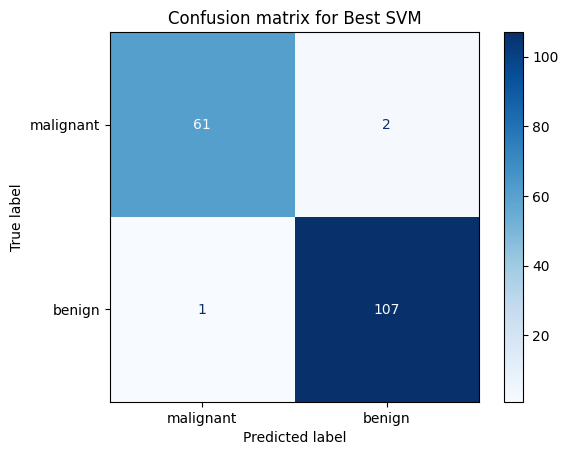

In [123]:
# 최종 모델로 테스트 데이터 평가
y_pred = clf.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred, pos_label=0)

print("===== 결과 확인 =====")
print(f'Best Parameters: {clf.best_params_}')
print(f'Model testing accuracy: {test_accuracy:.4f}')
print(f'Model Testing Recall: {test_recall:.4f}')

# Confusion Matrix 시각화
matrix = ConfusionMatrixDisplay.from_estimator(
    clf, X_test_scaled, y_test,
    cmap=plt.cm.Blues,
    display_labels=bc.target_names
)

plt.title('Confusion matrix for Best SVM')
plt.show()

최종 모델의 성능 향상은 단순한 정확도 수치 상승에 그치지 않는다. 오차 행렬을 세부적으로 분석했을 때, False Negative 데이터가 1단계의 11개에서 최종 2개로 감소하였다. 이는 모델이 분류하기 까다로운 경계선 부근의 데이터를 명확하게 구분해 내고 있음을 보여주는 정량적 증거다. 결과적으로 0.9683이라는 높은 재현율을 달성했으며, 이는 모델이 Positive 클래스에 속한 데이터의 특징을 96% 이상의 확률로 정확히 포착하고 있음을 증명한다.

[Stage 1] Acc: 0.9666, Recall: 0.9481, F1: 0.9549
[Stage 4] Acc: 0.9825, Recall: 0.9683, F1: 0.9760


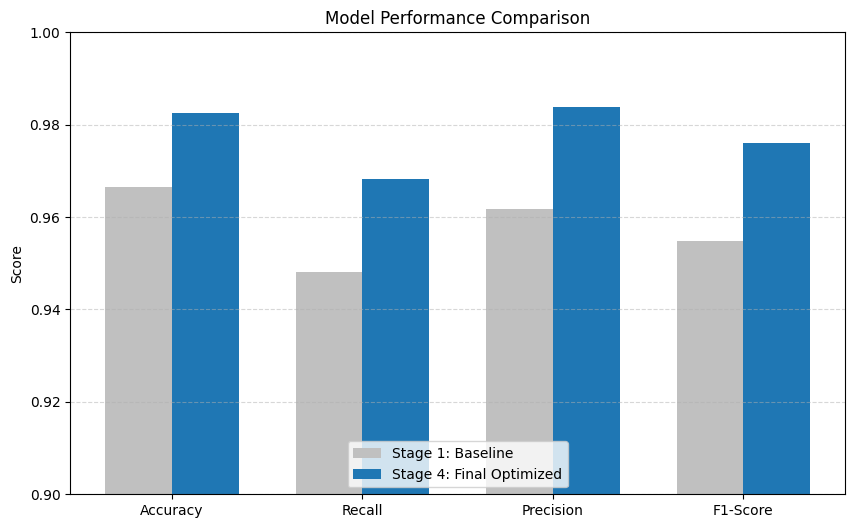

In [124]:
# 1단계, 4단계 비교 시각화
bc = datasets.load_breast_cancer()
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = bc.target

def get_scores(y_true, y_pred, title):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred, pos_label=0)
    prec = precision_score(y_true, y_pred, pos_label=0)
    f1 = f1_score(y_true, y_pred, pos_label=0)

    print(f"[{title}] Acc: {acc:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    return [acc, rec, prec, f1]

# 1단계 재현: 전체 데이터 학습/평가
svm_stage1 = SVC(kernel='linear', C=1, random_state=42)
svm_stage1.fit(X, y)
y_pred_s1 = svm_stage1.predict(X)
stage1_scores = get_scores(y, y_pred_s1, "Stage 1")

# 4단계 재현: 하이퍼파라미터 튜닝
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_stage4 = SVC(kernel='linear', C=0.1, gamma=0.001, random_state=42)
svm_stage4.fit(X_train_scaled, y_train)
y_pred_s4 = svm_stage4.predict(X_test_scaled)

stage4_scores = get_scores(y_test, y_pred_s4, "Stage 4")


# 시각화 (계산된 stage1_scores, stage4_scores 사용)
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, stage1_scores, width, label='Stage 1: Baseline', color='silver')
rects2 = ax.bar(x + width/2, stage4_scores, width, label='Stage 4: Final Optimized', color='#1f77b4')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower center')
ax.set_ylim(0.90, 1.0)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

실험 초기 모델은 96.66%라는 높은 정확도를 기록했지만, 이는 동일한 데이터로 학습과 평가를 수행한 결과로 과적합의 영향을 크게 받은 수치였다. 실제로 False Negative가 11건이나 발생하여, 높은 정확도에도 불구하고 진단 모델로서의 신뢰성은 충분하지 않은 상태였다. 이후 데이터 분할 및 교차 검증을 통해 성능을 다시 평가한 결과, 데이터가 어떻게 나누어지는지에 따라 성능이 최대 6% 이상 요동치는 구조적 불안정성이 존재함이 확인되었다.

이를 해결하기 위해 모델의 구조적 최적화와 하이퍼파라미터 조정을 단계적으로 수행한 결과, 최종 모델은 학습 점수와 테스트 점수 간의 차이를 크게 줄이며 새로운 데이터에서도 안정적인 예측 성능을 보였다. 최적화된 모델은 98.25%의 정확도와 96.83%의 재현율을 달성하였고, 특히 가장 중요한 오류 유형인 False Negative를 초기 11건에서 단 2건으로 크게 감소시키는 성과를 보일 수 있었다.